# ***1.	Data Cleaning and Preparation:***

In [ ]:
#LOADING THE DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Cardiotocographic.csv")

In [ ]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
#CHECKING THE DATA TYPE
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [ ]:
#FINDING THE MISSING VALUES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
data.shape

(2126, 14)

In [ ]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [ ]:
data.skew()

LB          0.320747
AC          2.016787
FM          6.753070
UC          0.974239
DL          2.010390
DS          8.418984
DP          6.422466
ASTV        0.055872
MSTV        4.142518
ALTV        2.981199
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

In [ ]:
# Filling missing values with the mean
data['LB'] = data['LB'].fillna(data['LB'].mean())
data['AC'] = data['AC'].fillna(data['AC'].median())
data['DS'] = data['DS'].fillna(data['DS'].median())
data['DP'] = data['DP'].fillna(data['DP'].median())
data['MLTV'] = data['MLTV'].fillna(data['MLTV'].median())
data['Width'] = data['Width'].fillna(data['Width'].mean())
data['Tendency'] = data['Tendency'].fillna(data['Tendency'].mean())
data['NSP'] = data['NSP'].fillna(data['NSP'].median())
# Checking for missing values again
data.isnull().sum()


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [ ]:
data.skew()

LB          0.322341
AC          2.032396
FM          6.753070
UC          0.974239
DL          2.010390
DS          8.461304
DP          6.456342
ASTV        0.055872
MSTV        4.142518
ALTV        2.981199
MLTV        3.561739
Width       0.497707
Tendency   -0.499257
NSP         1.826906
dtype: float64

<Axes: >

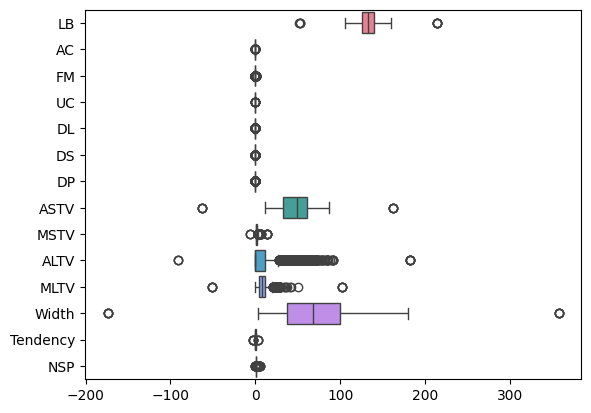

In [ ]:
#creating the box plot to check missing values
sns.boxplot(data,orient = "h")

# ***2.	Statistical Summary:***

In [ ]:
#statistical summary for each variable in the dataset

summary = data.describe()
print(summary)


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003204     0.009894     0.004391     0.001895   
std      11.214328     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [ ]:
iqr = data.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile range (IQR):\n", iqr)

Interquartile range (IQR):
 LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


# ***3.	Data Visualization:***

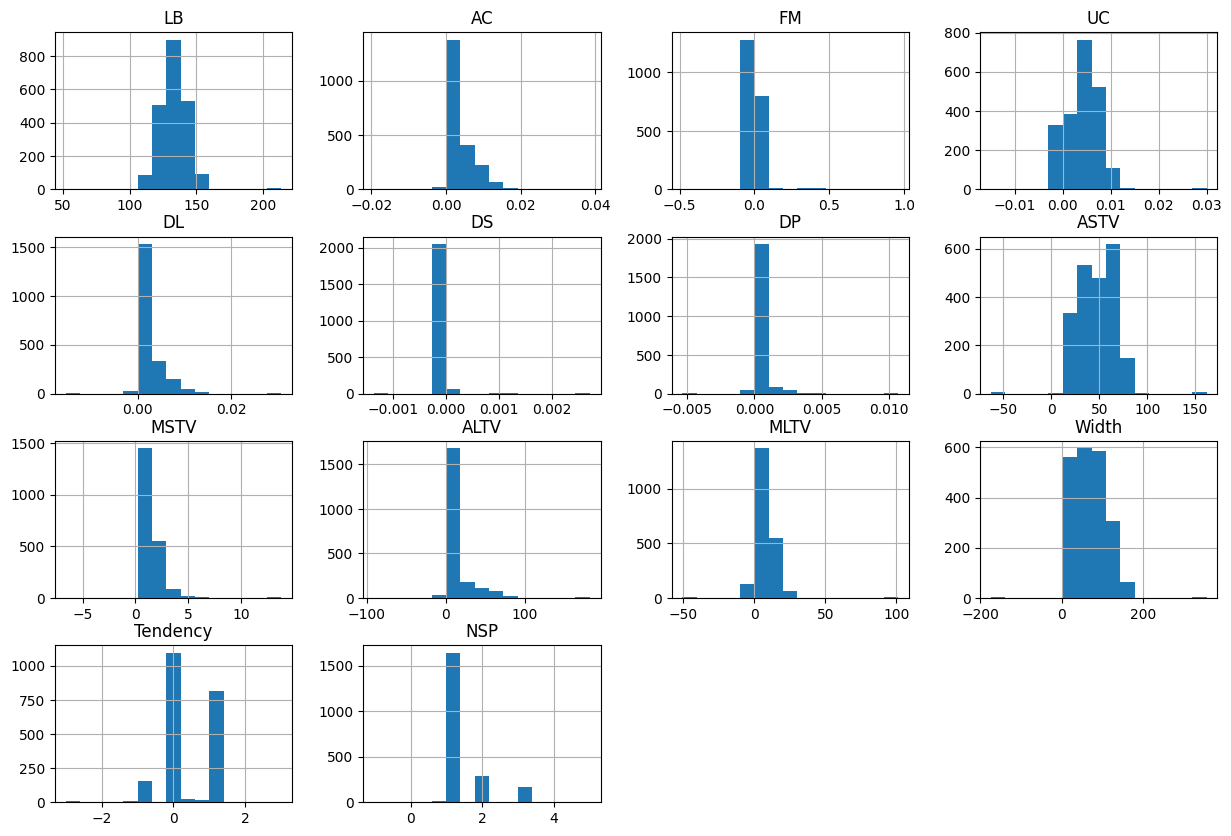

In [ ]:
#HISTOGRAME

data.hist(bins=15, figsize=(15, 10))
plt.show()

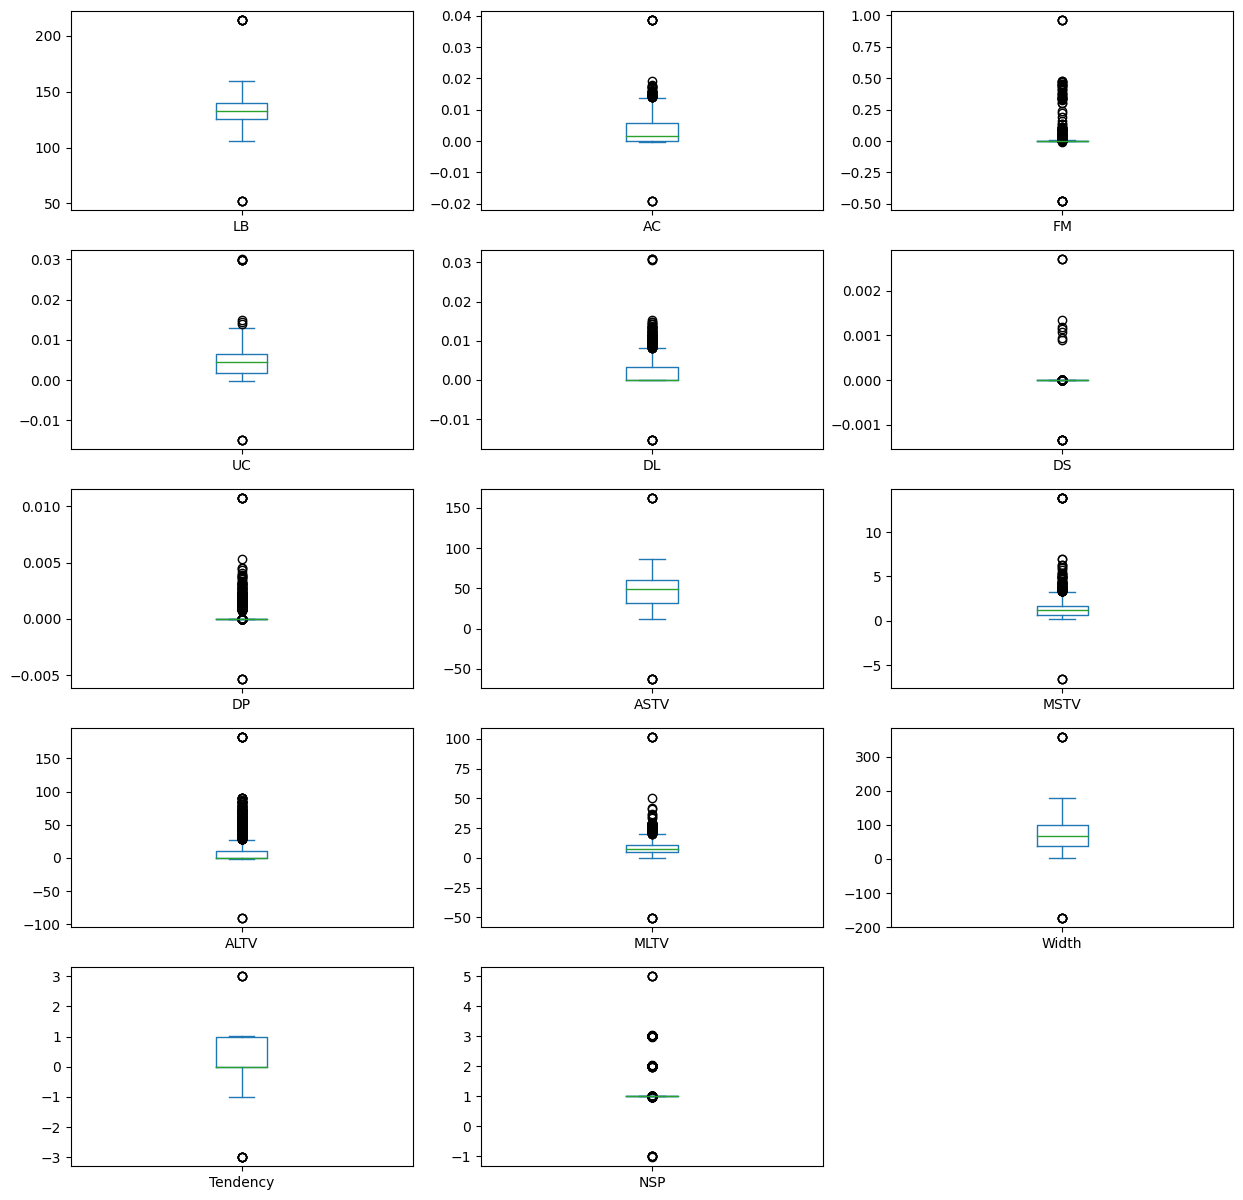

In [ ]:
#BOX PLOT

data.plot(kind='box', subplots = True,  figsize=(15, 15),  layout=(5, 3))
plt.show()

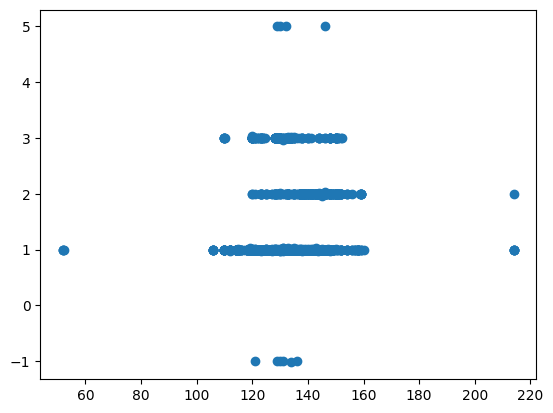

In [ ]:
#SCATTER PLOT
plt.scatter(x = data["LB"], y = data["NSP"])
plt.show()

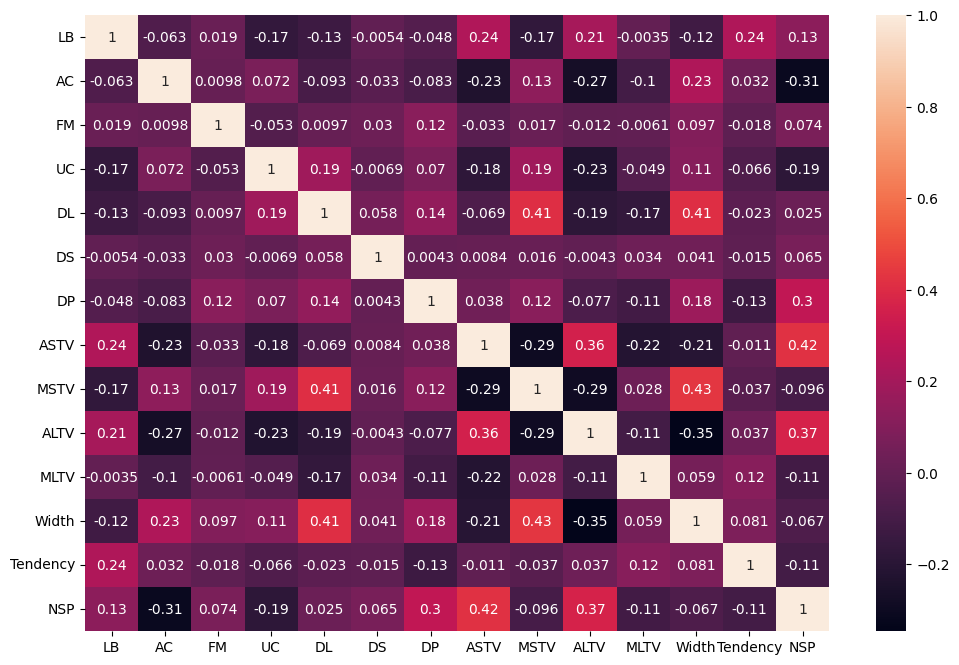

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

# ***4.	Pattern Recognition and Insights:***

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062801  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062801  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018776  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166201  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126536 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005438 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047713 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.169561  0.132962  0.017055  0.189406  0.410102  0.016026   
ALTV      0.210446 -0.269807 -0.011936 -0.227304 -0.186967 -0.004335   
MLTV     -0.003457 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118425  0.234591  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031958 -0.018338 -0.066463 -0.023490 -0.01

In [ ]:
# Identify strong correlations (threshold: |correlation| > 0.6)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.9]
print("Strong correlations:\n", strong_correlations)

Strong correlations:
            LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  Na

**COLUMNS HAVE POSITIVE CORRELARION BETWEEN THEM:**


*  NSP - ASTV
*   WIDTH - DL
*   WIDTH - MSTV
*   MSTV - DL


# **Key Insights and Patterns:**

* **Missing Values:** Initially, the dataset contained missing values in several columns (LB, AC, DS, DP, MLTV, Width, Tendency, NSP).

    These were addressed by imputation using mean or median, depending on the distribution of the data.
* **Data Distribution:** Histograms revealed the distribution of each variable, helping to understand their ranges and potential outliers.
* **Outliers:** Box plots provided a visual representation of outliers, particularly in variables like ASTV, ALTV, and Width. These outliers might require further investigation or specific handling depending on the analysis goals.


* **Relationships between Variables:** Scatter plots and the correlation heatmap helped identify potential relationships between variables.

    For instance, a positive correlation was observed between LB (baseline fetal heart rate) and NSP (fetal state classification).
* **Strong Correlations:** The correlation analysis revealed strong correlations between certain variables, such as between DS and DP (percentage of time with abnormal short and prolonged decelerations, respectively). This suggests potential redundancy and might influence feature selection for modeling.


# **Impact on Decision-Making and Further Analyses:**

* **Feature Selection:** The identified strong correlations could guide feature selection for predictive modeling, potentially removing redundant variables to improve model efficiency and interpretability.

* **Outlier Handling:** The presence of outliers might necessitate specific strategies, such as outlier removal, transformation, or the use of robust statistical methods, depending on the context and the goals of the analysis.

* **Predictive Modeling:** The insights gained from the exploratory analysis can inform the choice of appropriate machine learning models for predicting fetal state classification (NSP) based on the available features.

* **Further Investigation:** The observed relationships between variables could prompt further investigation into the underlying physiological mechanisms and potential clinical implications.


This suggests that non-linear models (e.g., decision trees, random forests, or neural networks) might be more appropriate than linear models for predictive tasks.

Given the medical nature of the data, creating new features or ratios between existing features might provide additional insights. For example, combining information from correlated features like LB and Width could yield meaningful new predictors.

#The boxplot reveals:

* Several features, including AC, FM, UC, DL, DS, and DP, have numerous outliers.

* ASTV, MSTV, ALTV, and MLTV also show some outliers. These outliers might need further investigation and potentially special treatment in analysis or modeling.

* Class Imbalance: The significant imbalance in the NSP classes (normal, suspect, pathologic) will impact any predictive modeling. Techniques like oversampling, undersampling, or using class weights may be necessary to ensure balanced predictions.